## Decision Tree Algorithm

### 1. Load Libraries

In [ ]:
# !pip install graphviz

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

##### Scikit Learn modules needed for Decision Trees
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler

# Plotting libraries
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

### 2. Load Data

In [5]:
# Load data

df = pd.read_csv('../2.Regression/data/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 3. Preprocessing of Data

In [6]:
# Preprocessing of data
# Creating 3 classes based on quality <= 4 , low; quality > 4 <= 8, medium else high
def create_level(x):
    # function to create levels basis wine quality
    if x <= 5:
        x = "low"
    elif x > 5 and x < 7:
        x = "medium"
    else:
        x = "high"
    return x

In [7]:
df['level'] = df['quality'].apply(lambda x: create_level(x))

In [8]:
print(df.quality.describe())
print(df.level.value_counts())

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64
low       744
medium    638
high      217
Name: level, dtype: int64


In [9]:
# Encoding of categorical class variable to integers which will be used for feeding the model
le = LabelEncoder()
le_encoded = le.fit_transform(df['level'])
#le_encoded = le.transform(le)
print((le.classes_))
print(le_encoded)

['high' 'low' 'medium']
[1 1 1 ... 2 1 2]


### 4. Split Data in Training & Testing samples

In [10]:
# Train & Test split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:10],le_encoded,test_size=0.20,
                                                    random_state=21)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(1279, 10)
Shape of Test Xs:(320, 10)
Shape of Training y:(1279,)
Shape of Test y:(320,)


### 5. Build Decision Tree Model

In [11]:
# Build Model
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_test)
score=clf.score(x_test,y_test);#testing the deciosion tree model

In [12]:
score

0.65

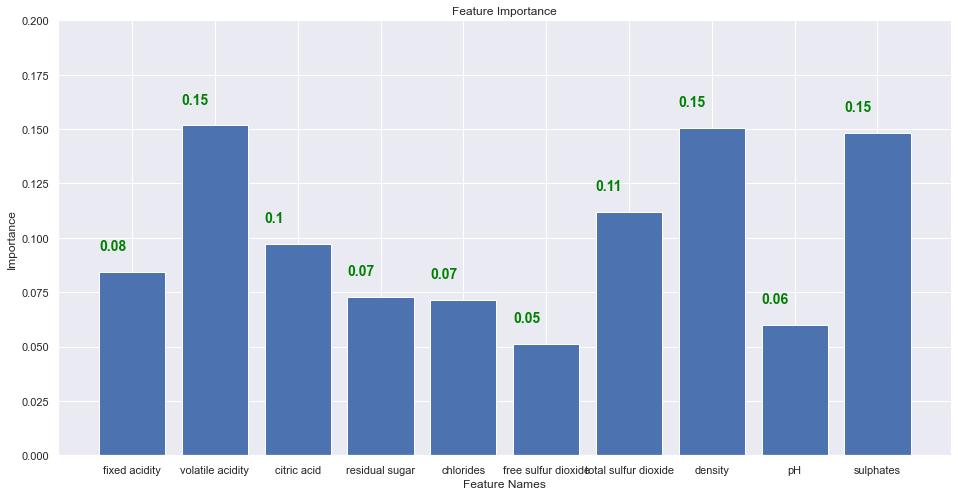

In [13]:
variableImp = pd.DataFrame({"Feature":df.columns[:10],"Importance":clf.feature_importances_})

fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(8)
ax.bar(x = variableImp.Feature, height = variableImp.Importance)
#ax.barh(x = df['Gender'], height = np.mean(df.score))
ax.set_title('Feature Importance')
ax.set_xlabel('Feature Names')
ax.set_ylabel('Importance')
ax.set_ylim(top = 0.2)
for i, v in enumerate(variableImp.Importance):
    ax.text(i-0.4, v + 0.01, s = np.round(v,2), color='green', fontweight='bold',fontsize=14)

In [ ]:
# Model diagnostic
print(score)
print(y_predicted)

In [14]:
df.columns[0:10]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates'],
      dtype='object')

### 6. Predict outcome using the Test Data

In [15]:
# Prediction on Test Data
y_predicted_labels = le.inverse_transform(y_predicted)
y_predicted_labels[0:10]

array(['medium', 'medium', 'low', 'low', 'medium', 'high', 'low', 'low',
       'low', 'low'], dtype=object)

In [16]:
true_labels = le.inverse_transform(y_test)
true_labels[0:10]

array(['medium', 'medium', 'low', 'medium', 'medium', 'high', 'low',
       'low', 'low', 'low'], dtype=object)

### 7. Confusion Matrix

In [ ]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(true_labels, y_predicted_labels)
np.set_printoptions(precision=2)
cnf_matrix

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=le.classes_,
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= le.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Graphviz Windows external library:
https://bobswift.atlassian.net/wiki/spaces/GVIZ/pages/20971549/How+to+install+Graphviz+software

In [ ]:
graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names = df.columns[0:10], class_names = ['0', '1', '2'] 
   , filled = True))

graph.format = 'png'
graph.render('dtree_render',view=True)

display(SVG(graph.pipe(format='svg')))

In [ ]:
tree.export_graphviz(clf,out_file='tree.dot')  

### Problem of Overfitting

- Over-fitting is the phenomenon in which the learning system tightly fits the given training data so much that it would be inaccurate in predicting the outcomes of the untrained data.

<img style="float: left;" src = "./img/overfitting.png" width="600" height="600">

**Overfitting results** in decision trees that are more complex than necessary. Key reasons:
- Tree growth went too far
- Number of instances gets smaller as we build the tree (e.g., several leaves match a single example)

**Avoid Overfitting** in decision trees:
- Using method of Prunning (Early Stopping Method)
    1. Stop if number of instances is less than some user-specified threshold
    2. Stop if expanding the current node does not improve impurity measures (e.g., GAIN)

In [17]:
# Build Model
clf = DecisionTreeClassifier(criterion= "entropy",max_depth= 6)
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_test)
score=clf.score(x_test,y_test);#testing the linear regression model

In [18]:
score

0.60625

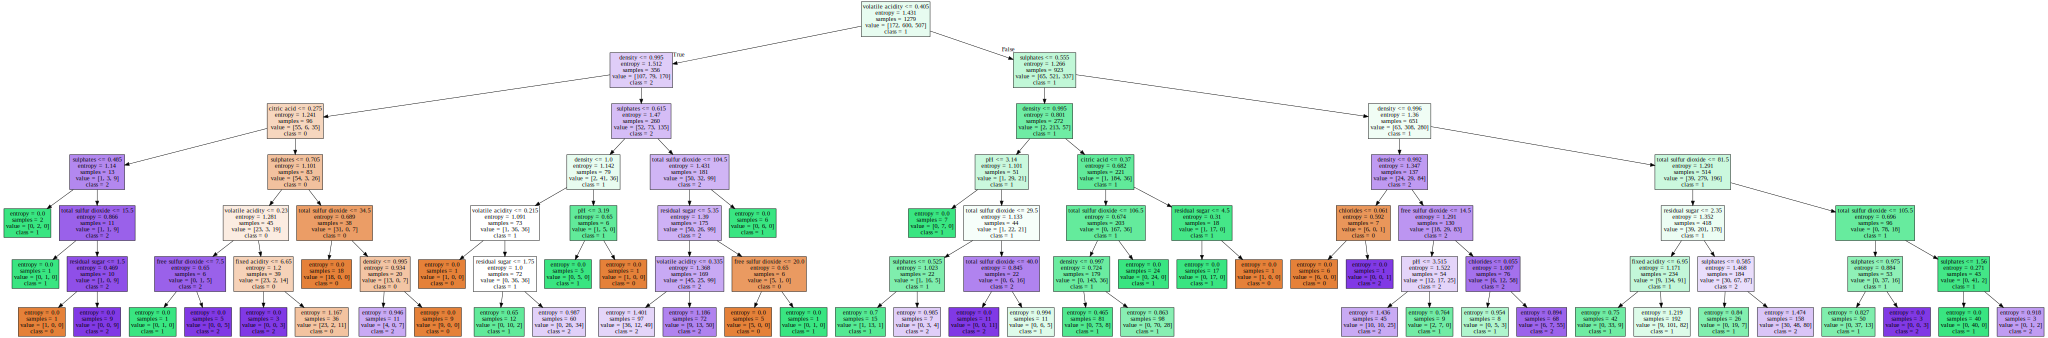

In [19]:
graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names = df.columns[0:10], class_names = ['0', '1', '2'] 
   , filled = True))

graph.format = 'png'
graph.render('dtree_render',view=True)

display(SVG(graph.pipe(format='svg')))

In [ ]:
tree.export_graphviz(clf,out_file='tree.dot')  

### Hyper Parameter Tuning

- In contrast to __model parameters__ which are learned during training, __model hyperparameters__ are set by the data scientist ahead of training and control implementation aspects of the model. 
- The __weights learned during training__ of a linear regression model are __parameters__ while the __max heightt of a tree Decision Tree is a model hyperparameter__ because this is set by the Machine Learning Engineer. 
- __Hyperparameters__ can be thought of as __model settings__. These settings need to be tuned for each problem because the best model hyperparameters for one particular dataset will not be the best across all datasets. 
- The process of hyperparameter tuning (also called __hyperparameter optimization)__ means finding the combination of hyperparameter values for a machine learning model that performs the best - as measured on a validation dataset - for a problem.

<img src="./img/train_test.png" alt="Train & Test Methodology" width="700" height="600">

In [21]:
DecisionTreeClassifier()

sklearn.tree._classes.DecisionTreeClassifier

In [22]:
## Below packages are needed for Hyper Parameter Tuning of an Algorithm in Scikit Learn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [23]:
# Code to check if there are any blank / empty / null values in dataframe
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
level                   0
dtype: int64

### More about Data Pipelines Using Scikit Learn
https://scikit-learn.org/stable/modules/compose.html#pipeline

### More about Column Transformer
https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html?highlight=column%20transformer#sklearn.compose.ColumnTransformer

In [24]:
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = df.columns[0:10]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())])

# categorical_features = 
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        #('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

In [25]:
clf.steps

[('preprocessor',
  ColumnTransformer(transformers=[('num',
                                   Pipeline(steps=[('imputer', SimpleImputer()),
                                                   ('scaler', MinMaxScaler())]),
                                   Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
         'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
         'pH', 'sulphates'],
        dtype='object'))])),
 ('classifier', DecisionTreeClassifier())]

In [26]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__criterion': ["gini","entropy"],
    'classifier__max_depth':[10,20,30,40]
}

grid_search = GridSearchCV(clf, param_grid, cv=10, iid=False,verbose = 1,n_jobs= -1)
grid_search.fit(x_train, y_train)

print(("best Model from grid search: %.3f"
       % grid_search.score(x_test, y_test)))
# Print your best combination of hyper parameters
print("Optimum setting of hyperparameters:................")
grid_search.best_params_

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    8.3s


best Model from grid search: 0.653
Optimum setting of hyperparameters:................


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   13.5s finished
/Users/paragpradhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


{'classifier__criterion': 'gini',
 'classifier__max_depth': 20,
 'preprocessor__num__imputer__strategy': 'mean',
 'preprocessor__num__scaler': StandardScaler()}

In [27]:
import joblib
joblib.dump(grid_search,"DecisionTree.model")

['DecisionTree.model']

In [28]:
test_model = joblib.load('DecisionTree.model')

In [29]:
y_predicted = test_model.predict(x_test)
score=test_model.score(x_test,y_test);#testing the linear regression model
score

0.653125